Python（scikit-learn）による機械学習実装20問

https://www.youtube.com/watch?v=Fbynk_9TfXg

# 1　データの読み込み
data.csvをdfとして読み込み、先頭の5件を表示しなさい。

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df.head()

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male


# 2 欠損値の確認
dfのカラムごとの欠損値の数を確認しなさい

In [207]:
df.isnull().sum()

Name      0
Age     177
Sex      13
dtype: int64

# 3 欠損値除去
欠損値のある行を削除しなさい

In [208]:
df_ = df.dropna()
df_.isnull().sum()

Name    0
Age     0
Sex     0
dtype: int64

# 4 欠損値補完
ageカラムの統計値を確認したあと、欠損値を以下の3つのパターンで補完しなさい。
- 0
- 平均値
- 中央値

In [209]:
df.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [210]:
df_zero = df.fillna(0)
df_zero.tail()

,Name,Age,Sex
886,"Montvila, Rev. Juozas",27.0,male
887,"Graham, Miss. Margaret Edith",19.0,female
888,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,female
889,"Behr, Mr. Karl Howell",26.0,male
890,"Dooley, Mr. Patrick",32.0,male


In [211]:
df_mean = df.fillna(int(df['Age'].mean()))
df_mean.tail()

,Name,Age,Sex
886,"Montvila, Rev. Juozas",27.0,male
887,"Graham, Miss. Margaret Edith",19.0,female
888,"Johnston, Miss. Catherine Helen ""Carrie""",29.0,female
889,"Behr, Mr. Karl Howell",26.0,male
890,"Dooley, Mr. Patrick",32.0,male


In [212]:
df_median = df.fillna(int(df['Age'].median()))
df_median.tail()

,Name,Age,Sex
886,"Montvila, Rev. Juozas",27.0,male
887,"Graham, Miss. Margaret Edith",19.0,female
888,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,female
889,"Behr, Mr. Karl Howell",26.0,male
890,"Dooley, Mr. Patrick",32.0,male


# 5 乱数補完（part1 乱数生成）
ageカラムの値を元に乱数（平均と分散はageカラムから算出）を作成しなさい

ヒント：
- np.random.randint()
- 範囲はageカラムの平均から標準偏差を足し引きする

In [213]:
mean = df['Age'].mean()
std = df['Age'].std()
num = df['Age'].isnull().sum()

# 「最小値」「最大値」「生成する乱数の数」を指定
rand = np.random.randint(mean-std, mean+std, size=num)
rand

array([17, 26, 16, 39, 25, 29, 36, 30, 36, 37, 16, 19, 40, 38, 15, 22, 29,
       18, 25, 19, 31, 17, 37, 43, 21, 16, 39, 19, 31, 23, 28, 17, 38, 36,
       33, 30, 39, 17, 43, 20, 17, 26, 18, 33, 25, 38, 37, 21, 39, 26, 41,
       42, 25, 33, 35, 27, 34, 15, 30, 16, 38, 32, 42, 21, 39, 39, 39, 31,
       41, 16, 43, 30, 23, 41, 17, 27, 36, 15, 26, 19, 32, 29, 18, 36, 16,
       38, 41, 26, 39, 18, 33, 33, 37, 18, 36, 41, 28, 28, 18, 38, 15, 20,
       42, 26, 39, 22, 36, 25, 36, 28, 16, 41, 33, 28, 26, 43, 33, 35, 42,
       16, 41, 39, 35, 30, 25, 22, 31, 35, 41, 18, 28, 32, 42, 18, 35, 18,
       31, 29, 43, 43, 23, 31, 17, 18, 33, 27, 15, 21, 36, 22, 40, 27, 39,
       15, 32, 39, 28, 32, 33, 32, 30, 15, 31, 40, 41, 37, 27, 40, 41, 33,
       37, 40, 22, 25, 18, 16, 30])

# 6 乱数補完（part2 前後の分布の確認）
補完前の分布を確認後、作成した乱数で欠損値を補完し、分布に差がないかを確認しなさい

<Axes: >

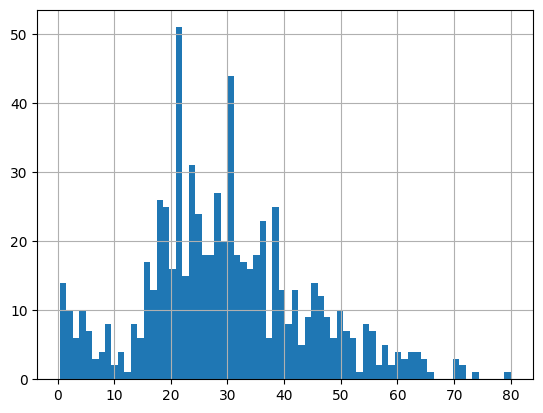

In [214]:
# 補完前の分布の確認
df['Age'].hist(bins=70)

C:\Users\81908\AppData\Local\Temp\ipykernel_1764\240640023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rand['Age'][df['Age'].isnull()] = rand


<Axes: >

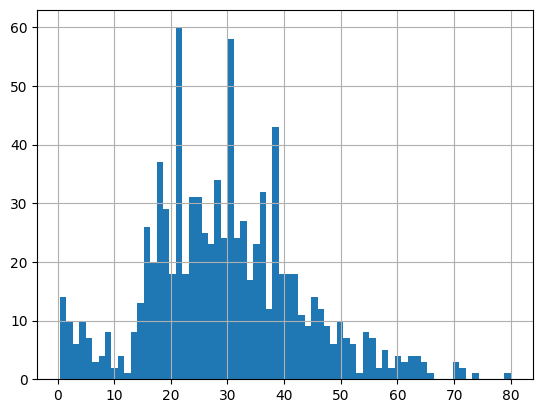

In [215]:
df_rand = df.copy()
df_rand['Age'][df['Age'].isnull()] = rand
df_rand['Age'].hist(bins=70)

# 7 前の値で補完
カラムsexの欠損値を一つ前の値で補完しなさい（NaN→female）

※時系列データの場合によく用いられる

In [216]:
# forward（前）の値でfill（補完）する
df['Sex'].fillna(method='ffill').head()

C:\Users\81908\AppData\Local\Temp\ipykernel_1764\3448006757.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sex'].fillna(method='ffill').head()


0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

# 8 ダミー変数へ変換
カテゴリ変数である性別（sex）カラムのデータをダミー表現（male→0、female→1）に変形させなさい

In [217]:
# df['Sex'].replace({'male':0, 'female':1})

pd.get_dummies(df['Sex']).drop('male', axis=1)

,female
0,False
1,True
2,False
3,True
4,False
...,...
886,False
887,True
888,True
889,False


# Min-Max Scaling
Ageカラムのデータを最小値0、最大値1に正規化しなさい

ただし、元のデータ範囲はAgeカラムの最大値最小値とする

ヒント：sklearn.preprocessingの中のモジュールを使う

In [218]:
from sklearn.preprocessing import MinMaxScaler

In [219]:
# インスタンス化
mmscaler = MinMaxScaler(copy=True)

# 最小値と最大値の取得
lim_min, lim_max = df['Age'].min(), df['Age'].max()

# 最小値と最大値を指定（縦向きのベクトルに変換してから）
mmscaler.fit(np.array([lim_min, lim_max]).reshape(-1, 1))

# MinMaxScalerを実装
mmscaler.transform(df[['Age']])

c:\Users\81908\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


array([[0.27117366],
       [0.4722292 ],
       [0.32143755],
       [0.43453129],
       [0.43453129],
       [       nan],
       [0.67328474],
       [0.01985423],
       [0.33400352],
       [0.17064589],
       [0.04498618],
       [0.72354863],
       [0.24604172],
       [0.48479517],
       [0.17064589],
       [0.68585072],
       [0.01985423],
       [       nan],
       [0.3842674 ],
       [       nan],
       [0.43453129],
       [0.42196532],
       [0.18321186],
       [0.34656949],
       [0.09525006],
       [0.4722292 ],
       [       nan],
       [0.23347575],
       [       nan],
       [       nan],
       [0.49736115],
       [       nan],
       [       nan],
       [0.8240764 ],
       [0.34656949],
       [0.52249309],
       [       nan],
       [0.25860769],
       [0.22090978],
       [0.17064589],
       [0.49736115],
       [0.33400352],
       [       nan],
       [0.03242021],
       [0.23347575],
       [       nan],
       [       nan],
       [     

# 10 標準化
Ageカラムのデータを平均0、分散1に標準化しなさい

In [220]:
from sklearn.preprocessing import StandardScaler

In [221]:
# インスタンス化
ss = StandardScaler()
ss.fit_transform(df[['Age']])

array([[-0.53037664],
       [ 0.57183099],
       [-0.25482473],
       [ 0.36516706],
       [ 0.36516706],
       [        nan],
       [ 1.67403863],
       [-1.90813618],
       [-0.18593675],
       [-1.08148046],
       [-1.77036023],
       [ 1.94959054],
       [-0.6681526 ],
       [ 0.64071897],
       [-1.08148046],
       [ 1.74292661],
       [-1.90813618],
       [        nan],
       [ 0.08961515],
       [        nan],
       [ 0.36516706],
       [ 0.29627909],
       [-1.01259248],
       [-0.11704878],
       [-1.49480832],
       [ 0.57183099],
       [        nan],
       [-0.73704057],
       [        nan],
       [        nan],
       [ 0.70960695],
       [        nan],
       [        nan],
       [ 2.50069435],
       [-0.11704878],
       [ 0.8473829 ],
       [        nan],
       [-0.59926462],
       [-0.80592855],
       [-1.08148046],
       [ 0.70960695],
       [-0.18593675],
       [        nan],
       [-1.83924821],
       [-0.73704057],
       [  

# 11 主成分分析（part1 標準化）
wine.csvを読み込み（df_wineとする）、classラベルを除いたデータを平均0、分散1で標準化（dfsとする）しなさい

In [222]:
df_wine = pd.read_csv('wine.csv')
df_wine.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [223]:
# classカラム以外を標準化
_dfs = ss.fit_transform(df_wine.iloc[:,1:])

# データフレーム化
dfs = pd.DataFrame(_dfs, columns=df_wine.columns[1:])
dfs.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# 12 主成分分析（part2 変換）
先ほど標準化したデータを用いてskleran.decompositionからPCAモデルを読み込み.transform()関数を用いてデータを変換しなさい（ただしfeatureという変数名にする）

In [224]:
from sklearn.decomposition import PCA

In [225]:
# インスタンス化
pca = PCA()

# 特徴量抽出
pca.fit(dfs)

# データ変換
feature = pca.transform(dfs)

# データフレーム化
feature = pd.DataFrame(feature, columns=['PC{}'.format(x+1) for x in range(len(dfs.columns))])
feature.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


# 13 主成分分析（part3 プロット）
先ほどのfeatureから第一主成分と第二主成分をプロットしなさい

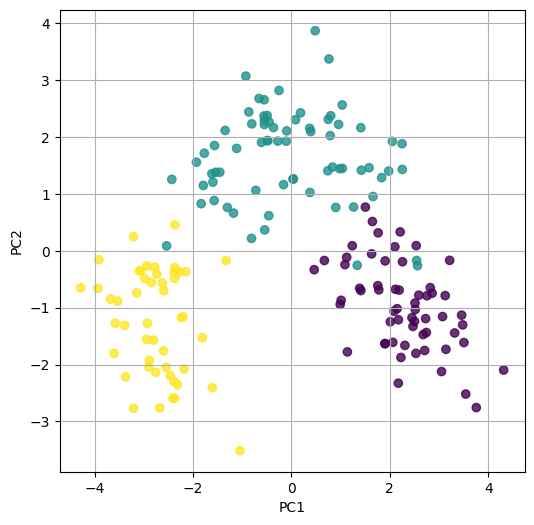

In [226]:
plt.figure(figsize=(6, 6))  #プロットサイズの指定
plt.scatter(feature['PC1'], feature['PC2'], alpha=0.8, c=df_wine['class'])  #alphaは透明度、cは色を指定
plt.grid()  #グリッド線を表示
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 14 ロジスティック回帰（part1 データ分割）
先ほどのデータを訓練データとテストデータに分割（8:2）しなさい

ただし入力はfeature第2列目までとし、出力はdf_wine先頭列とする

またデータの分割はsklearn.model_selection.train_test_splitを活用しなさい

random_stateは3とする

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
X = feature.iloc[:, :2]
y = df_wine.iloc[:, 0]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [229]:
x_train

,PC1,PC2
42,3.070807,-1.155919
67,0.183384,2.427146
31,2.677411,-1.471874
141,-2.286561,-0.372508
5,3.050254,-2.122401
...,...,...
21,1.086570,-0.241744
0,3.316751,-1.443463
131,-2.384501,-0.374583
152,-1.812541,-1.527646


# 15 ロジスティック回帰（part2 モデルの学習）
先ほどのtrainデータを用いてロジスティック回帰でモデルの学習を行いなさい

In [230]:
from sklearn.linear_model import LogisticRegression

In [231]:
# インスタンス化
lr = LogisticRegression()

# モデルの学習
lr.fit(x_train, y_train)

LogisticRegression()

# 16 ロジスティック回帰（part3 性能評価）
先ほど学習したモデルの精度（accuracy）を評価しなさい

ただし、sklearn.metrics.accuracy_scoreを活用すること

In [232]:
from sklearn.metrics import accuracy_score

In [233]:
# 予測
y_pred = lr.predict(x_test)

# モデルの性能評価
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9166666666666666

# 17 k-近傍法
先ほどのデータをk-近傍法で分類しなさい

In [234]:
from sklearn.neighbors import KNeighborsClassifier

In [235]:
# インスタンス化
knc = KNeighborsClassifier(n_neighbors=5)

# モデルの学習
knc.fit(x_train, y_train)

# 予測
y_pred = knc.predict(x_test)

# モデル評価（.scoreの場合は、予測値ではなく、テストデータをそのまま入力するだけでOK）
knc.score(x_test, y_test)

0.9166666666666666

In [236]:
# ハイパーパラメータチューニング
knc = KNeighborsClassifier(n_neighbors=40)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test)
knc.score(x_test, y_test)

0.9444444444444444

# 18 重回帰分析（part1 学習データ準備）
コンクリートのデータを用いて回帰の問題を解きます

slump.csvを読み込んで、訓練データとテストデータに分割（6:4）しなさい

ただし入力は第7列目までとし、出力は最終列とする

またデータの分割はsklearn.model_selection.train_test_splitを活用しなさい

random_stateは0とする


In [237]:
df_slump = pd.read_csv('slump.csv')
df_slump.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,26.82


In [238]:
x = df_slump.iloc[:, :-1]
y = df_slump.iloc[:, 7]

In [239]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# 19 重回帰分析（part2 モデルの学習）
先ほどの訓練データを使って重回帰分析を行いなさい

In [240]:
from sklearn.linear_model import LinearRegression

In [241]:
# インスタンス化
regressor = LinearRegression()

# モデルの学習
regressor.fit(x_train, y_train)

LinearRegression()

# 20 重回帰分析（part3 モデルの評価）
先ほど学習したモデルのテストデータにおける性能（決定係数R2、平均二乗誤差RMSE）を評価しなさい

ただし、sklearn.metricsからr2_scoreおよびmean_squared_errorを活用しなさい

In [242]:
from sklearn.metrics import r2_score, mean_squared_error

In [243]:
# 予測
y_pred = regressor.predict(x_test)

# モデル評価
print(f'r2_score: {r2_score(y_test, y_pred)}')
print(f'mean_squared_error: {mean_squared_error(y_test, y_pred)}')

r2_score: 0.8343195909006841
mean_squared_error: 9.390614418464391
